In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data_HR.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [9]:
# 업무 성과 별 직원들 수 확인
df.groupby('PerformanceRating')['EmployeeNumber'].count()

PerformanceRating
3    1244
4     226
Name: EmployeeNumber, dtype: int64

In [18]:
# 업무 성과 별 퇴사자 수 확인
df[['Attrition', 'PerformanceRating']].value_counts()

Attrition  PerformanceRating
No         3                    1044
Yes        3                     200
No         4                     189
Yes        4                      37
Name: count, dtype: int64

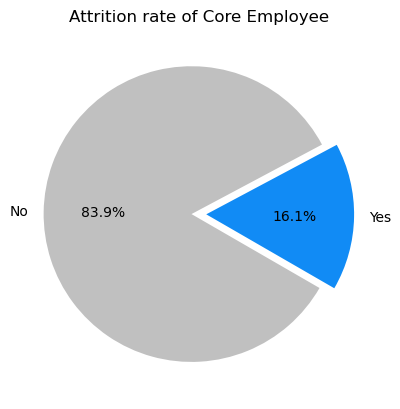

In [97]:
labels = ['No', 'Yes']
explode = [0.05, 0.05]
colors = ['silver', '#118BF5']
attr_counts = df['Attrition'].value_counts()
plt.pie(attr_counts, autopct='%.1f%%', startangle=330, explode=explode, counterclock=False, colors=colors, labels=labels)
plt.title('Attrition rate of Core Employee')
plt.show()

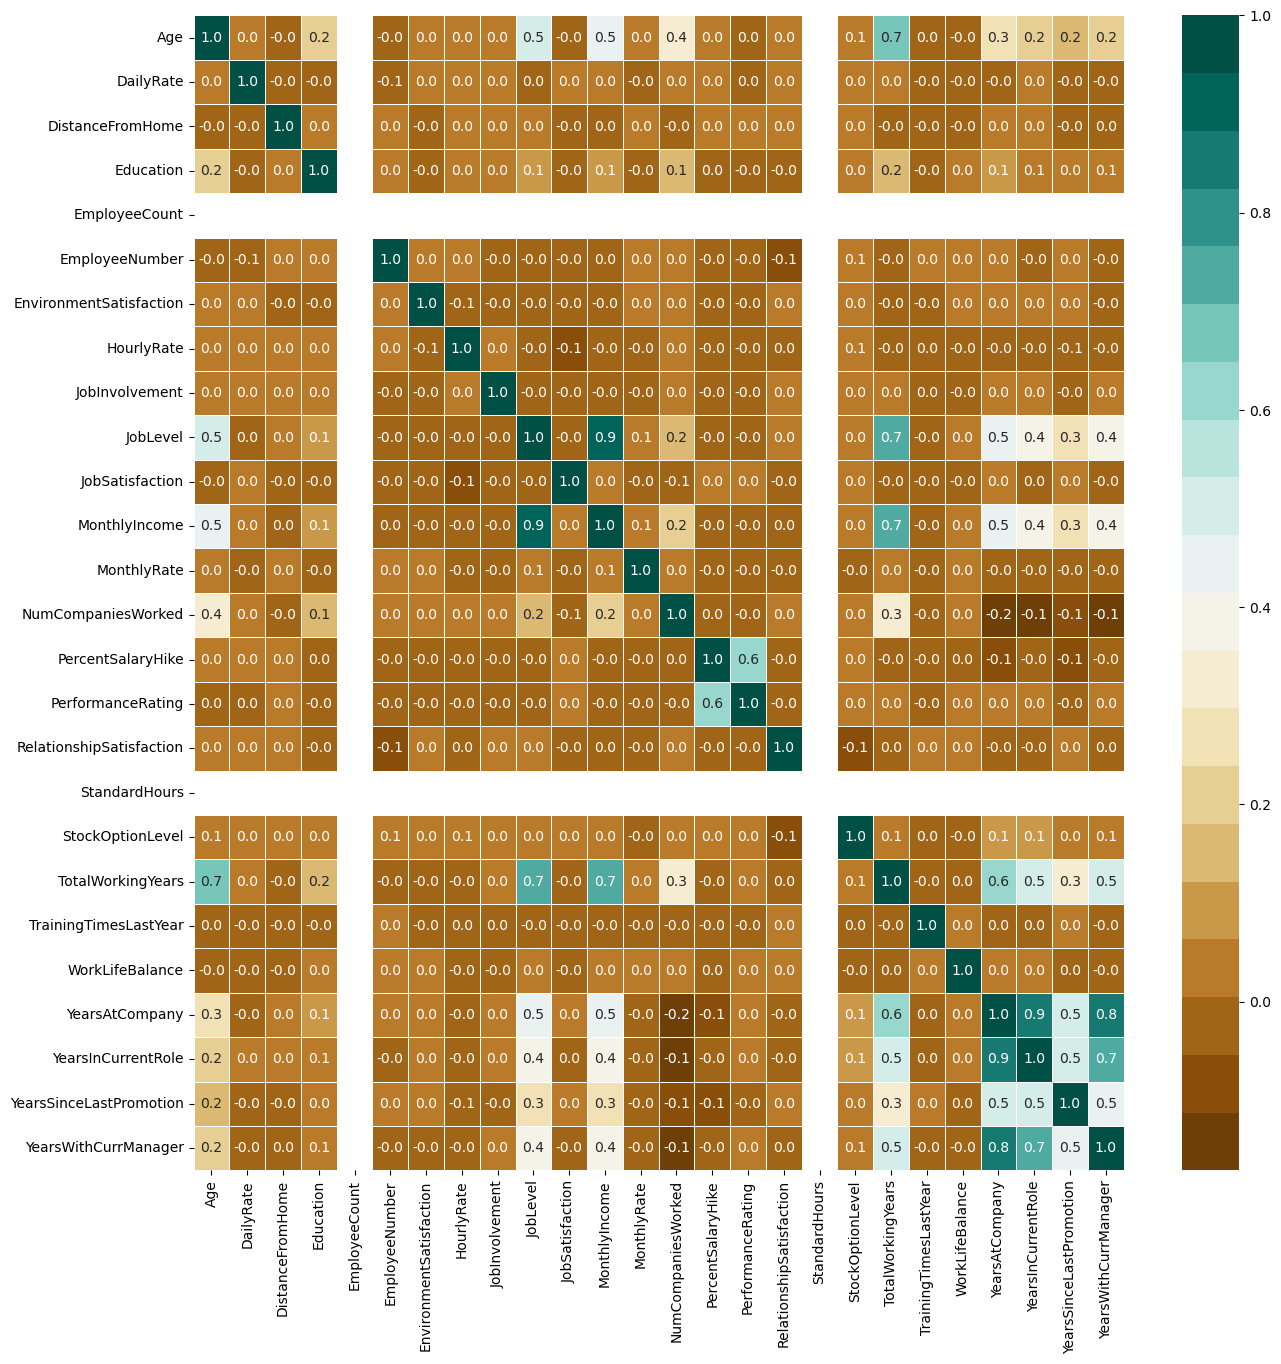

In [13]:
# 요인들 간 상관관계 확인
f,ax = plt.subplots(figsize=(15, 15)) 

sns.heatmap(df.corr(method='spearman', numeric_only=True), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap=sns.color_palette("BrBG", 20))
plt.show()

In [98]:
# 부서 별 인원 확인
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [132]:
# 부서 별 업무 성과 비율 확인
df[['Department', 'PerformanceRating']].value_counts()

Department              PerformanceRating
Research & Development  3                    805
Sales                   3                    385
Research & Development  4                    156
Sales                   4                     61
Human Resources         3                     54
                        4                      9
Name: count, dtype: int64

In [190]:
# 부서 별 업무 성과 비율 파이 차트 그리기
group_names = ['R&D', 'Sales', 'HR']
group_sizes = [961, 446, 63]
subgroup_sizes = [805, 156, 385, 61, 54, 9]

# 색상
a, b, c = [plt.cm.Purples, plt.cm.Greens, plt.cm.Blues]

width_num = 0.4

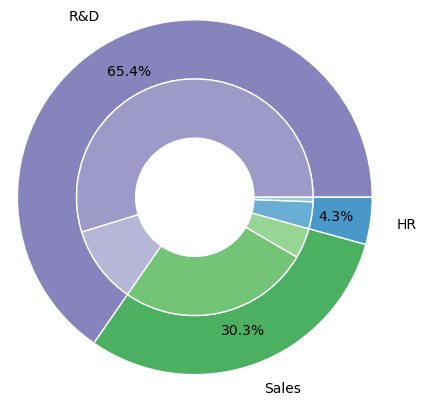

In [205]:
# 큰 도넛 차트 (Department 비율)
fig, ax = plt.subplots()
pie_outside, texts, autotexts = ax.pie(group_sizes, 
                                       radius=1.2,
                                       labels=group_names,
                                       labeldistance=1.15,
                                       colors=[a(0.6), b(0.6), c(0.6)],
                                       autopct='%1.1f%%',
                                       pctdistance=0.8)
plt.setp(pie_outside, width=width_num, edgecolor='white')

# 작은 도넛 차트 (Department 별 PerformanceRating)
pie_inside, texts_inside, autotexts_inside = ax.pie(subgroup_sizes,
                                                    radius=(1.2 - width_num),
                                                    labeldistance=0.6,
                                                    autopct='',
                                                    pctdistance=0.75,
                                                    colors=[a(0.5), a(0.4), 
                                                            b(0.5), b(0.4),
                                                            c(0.5), c(0.4)])
plt.setp(pie_inside, width=width_num, edgecolor='white')
plt.show()

In [14]:
# 성과 등급별로 데이터 분리
low_performance = df[df['PerformanceRating'] == 3]
high_performance = df[df['PerformanceRating'] == 4]

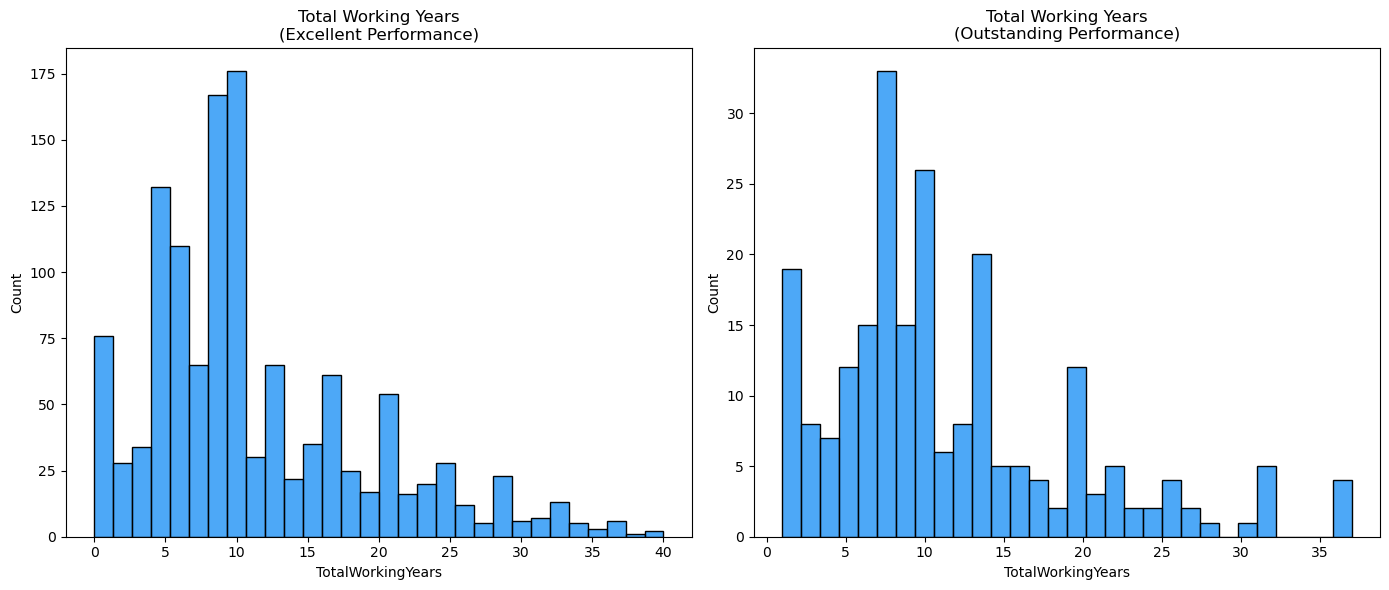

(count    1244.000000
 mean       11.257235
 std         7.780149
 min         0.000000
 25%         6.000000
 50%        10.000000
 75%        15.000000
 max        40.000000
 Name: TotalWorkingYears, dtype: float64,
 count    226.000000
 mean      11.402655
 std        7.800387
 min        1.000000
 25%        6.000000
 50%       10.000000
 75%       14.750000
 max       37.000000
 Name: TotalWorkingYears, dtype: float64)

In [48]:
# TotalWorkingYears
plt.figure(figsize=(14, 6))

# 낮은 성과 그룹
plt.subplot(1, 2, 1)
sns.histplot(low_performance['TotalWorkingYears'], bins=30, color='#118BF5')
plt.title('Total Working Years\n(Excellent Performance)')

# 높은 성과 그룹
plt.subplot(1, 2, 2)
sns.histplot(high_performance['TotalWorkingYears'], bins=30, color='#118BF5')
plt.title('Total Working Years\n(Outstanding Performance)')

plt.tight_layout()
plt.show()

# 기술통계 요약
summary_low_twy = low_performance['TotalWorkingYears'].describe()
summary_high_twy = high_performance['TotalWorkingYears'].describe()

summary_low_twy, summary_high_twy

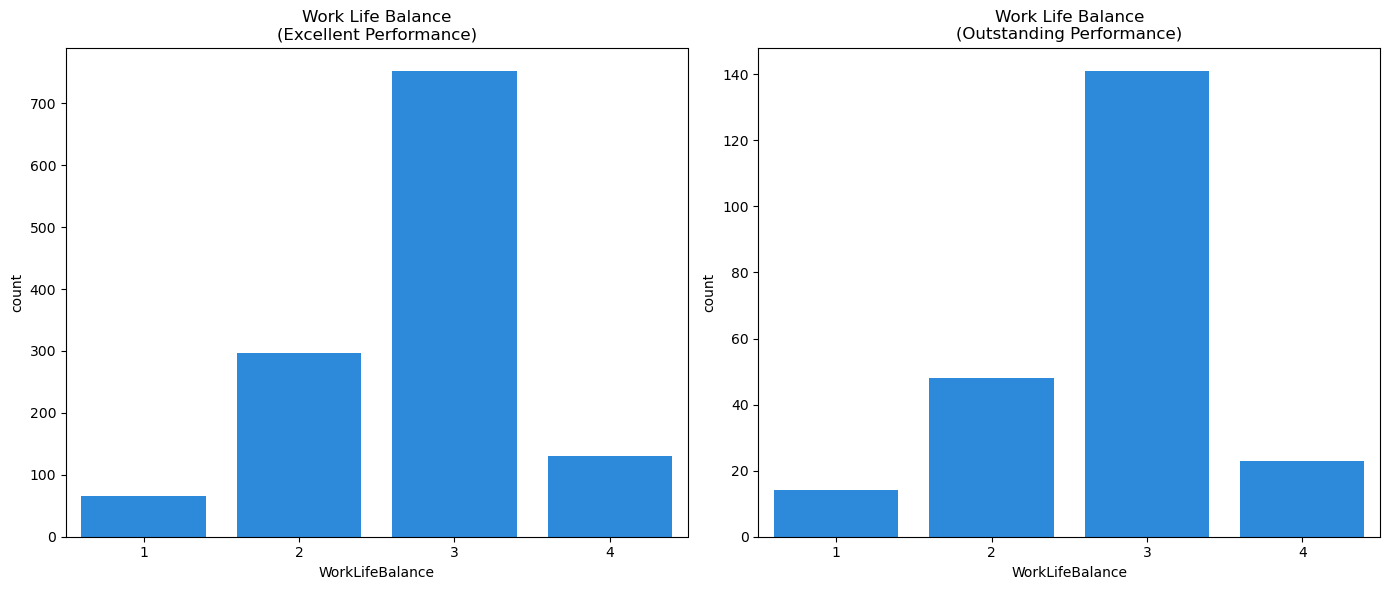

(WorkLifeBalance
 3    0.604502
 2    0.237942
 4    0.104502
 1    0.053055
 Name: proportion, dtype: float64,
 WorkLifeBalance
 3    0.623894
 2    0.212389
 4    0.101770
 1    0.061947
 Name: proportion, dtype: float64)

In [211]:
# WorkLifeBalance
plt.figure(figsize=(14, 6))

# 낮은 성과 그룹
plt.subplot(1, 2, 1)
sns.countplot(x=low_performance['WorkLifeBalance'], color='#118BF5')
plt.title('Work Life Balance\n(Excellent Performance)')

# 높은 성과 그룹
plt.subplot(1, 2, 2)
sns.countplot(x=high_performance['WorkLifeBalance'], color='#118BF5')
plt.title('Work Life Balance\n(Outstanding Performance)')

plt.tight_layout()
plt.show()

# 기술통계 요약
summary_low_wlf = low_performance['WorkLifeBalance'].value_counts(normalize=True)
summary_high_wlf = high_performance['WorkLifeBalance'].value_counts(normalize=True)

summary_low_wlf, summary_high_wlf

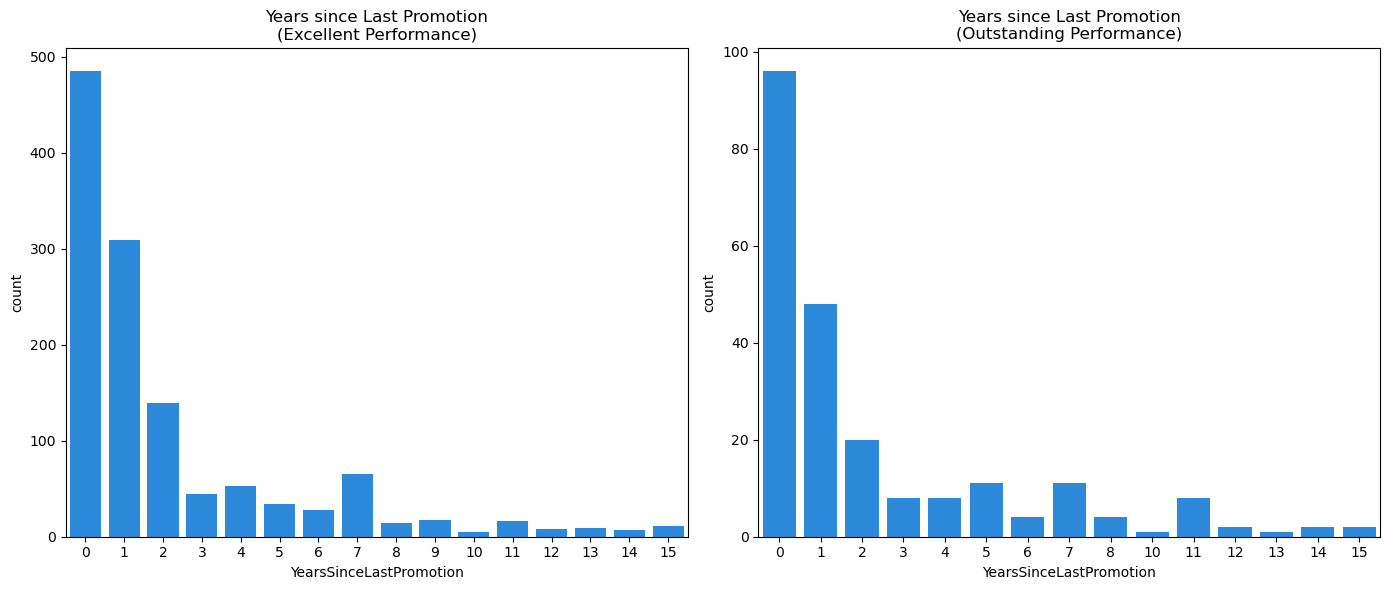

(count    1244.000000
 mean        2.163183
 std         3.178755
 min         0.000000
 25%         0.000000
 50%         1.000000
 75%         2.250000
 max        15.000000
 Name: YearsSinceLastPromotion, dtype: float64,
 count    226.000000
 mean       2.323009
 std        3.457308
 min        0.000000
 25%        0.000000
 50%        1.000000
 75%        3.000000
 max       15.000000
 Name: YearsSinceLastPromotion, dtype: float64)

In [45]:
#YearsSinceLastPromotion
plt.figure(figsize=(14, 6))

# 낮은 성과 그룹
plt.subplot(1, 2, 1)
sns.countplot(x=low_performance['YearsSinceLastPromotion'], color='#118BF5')
plt.title('Years since Last Promotion\n(Excellent Performance)')

# 높은 성과 그룹
plt.subplot(1, 2, 2)
sns.countplot(x=high_performance['YearsSinceLastPromotion'], color='#118BF5')
plt.title('Years since Last Promotion\n(Outstanding Performance)')

plt.tight_layout()
plt.show()

# 기술통계 요약
summary_low_ylp = low_performance['YearsSinceLastPromotion'].describe()
summary_high_ylp = high_performance['YearsSinceLastPromotion'].describe()

summary_low_ylp, summary_high_ylp

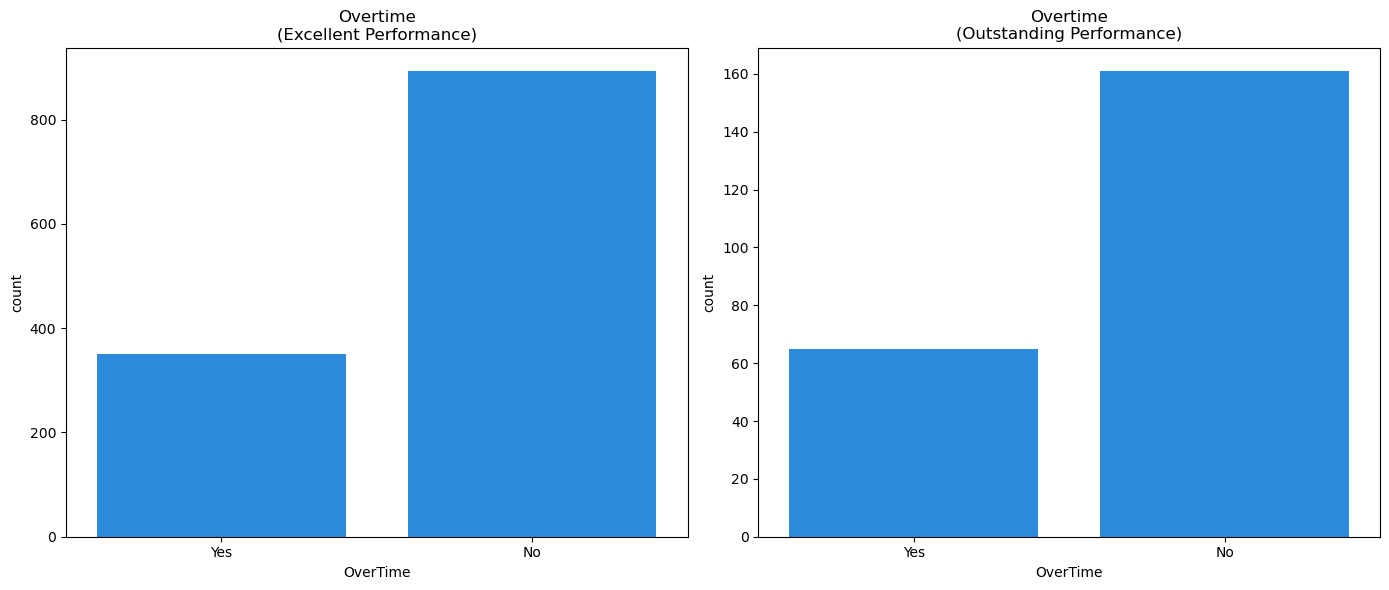

(OverTime
 No     893
 Yes    351
 Name: count, dtype: int64,
 OverTime
 No     161
 Yes     65
 Name: count, dtype: int64)

In [212]:
# Overtime
plt.figure(figsize=(14, 6))

# 낮은 성과 그룹
plt.subplot(1, 2, 1)
sns.countplot(x=low_performance['OverTime'], order=['Yes', 'No'], color='#118BF5')
plt.title('Overtime\n(Excellent Performance)')

# 높은 성과 그룹
plt.subplot(1, 2, 2)
sns.countplot(x=high_performance['OverTime'], order=['Yes', 'No'], color='#118BF5')
plt.title('Overtime\n(Outstanding Performance)')

plt.tight_layout()
plt.show()

# 기술통계 요약
summary_low_ot = low_performance['OverTime'].value_counts()
summary_high_ot = high_performance['OverTime'].value_counts()

summary_low_ot, summary_high_ot

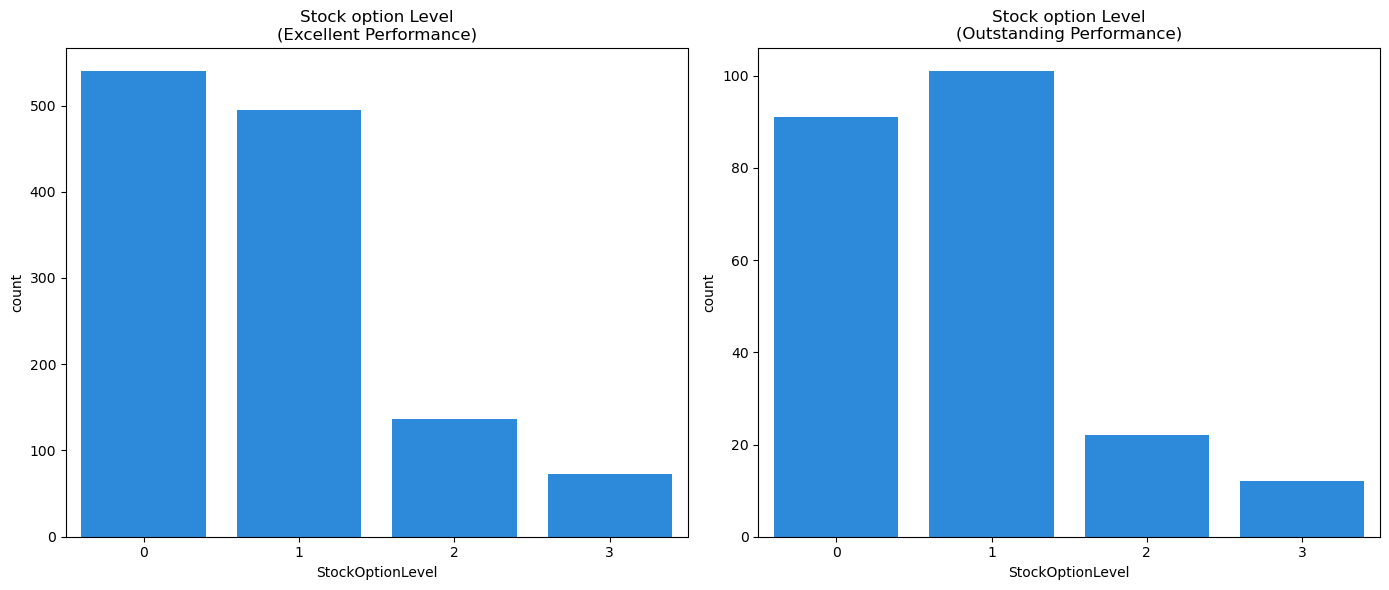

(StockOptionLevel
 0    0.434084
 1    0.397910
 2    0.109325
 3    0.058682
 Name: proportion, dtype: float64,
 StockOptionLevel
 1    0.446903
 0    0.402655
 2    0.097345
 3    0.053097
 Name: proportion, dtype: float64)

In [49]:
# StockOptionLevel
plt.figure(figsize=(14, 6))

# 낮은 성과 그룹
plt.subplot(1, 2, 1)
sns.countplot(x=low_performance['StockOptionLevel'], color='#118BF5')
plt.title('Stock option Level\n(Excellent Performance)')

# 높은 성과 그룹
plt.subplot(1, 2, 2)
sns.countplot(x=high_performance['StockOptionLevel'], color='#118BF5')
plt.title('Stock option Level\n(Outstanding Performance)')

plt.tight_layout()
plt.show()

# 기술통계 요약
summary_low_sol = low_performance['StockOptionLevel'].value_counts(normalize=True)
summary_high_sol = high_performance['StockOptionLevel'].value_counts(normalize=True)

summary_low_sol, summary_high_sol

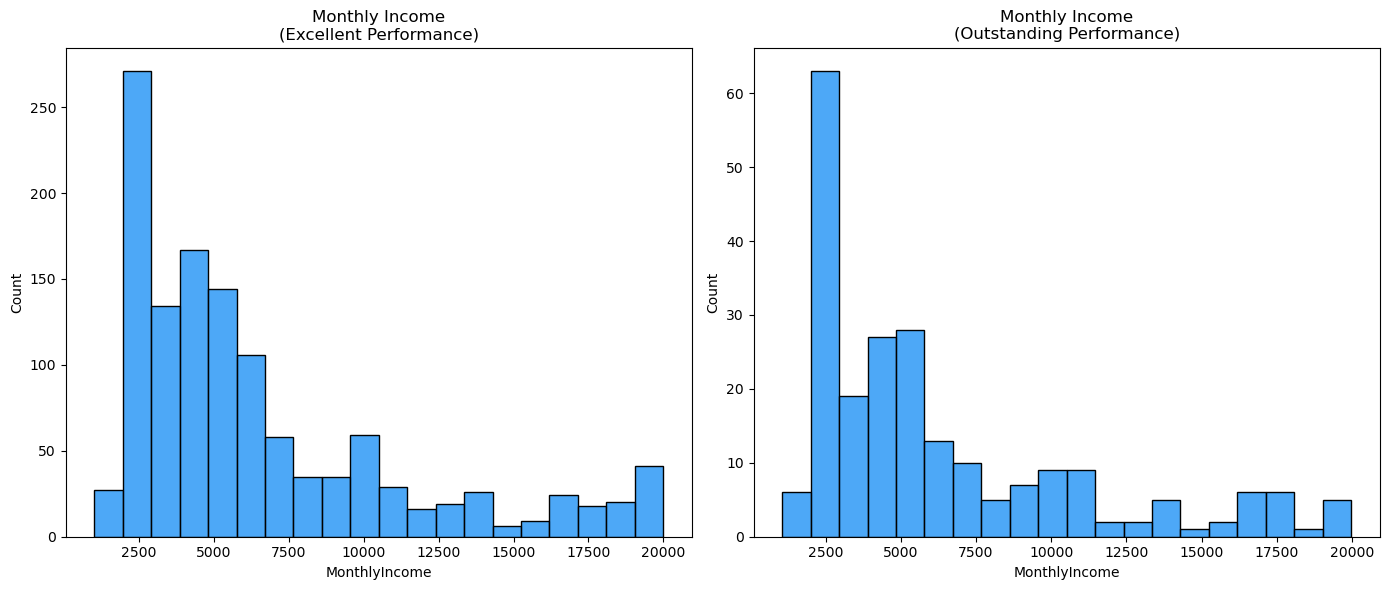

(count     1244.000000
 mean      6537.274116
 std       4715.194294
 min       1009.000000
 25%       2956.000000
 50%       4965.500000
 75%       8353.500000
 max      19999.000000
 Name: MonthlyIncome, dtype: float64,
 count      226.000000
 mean      6313.893805
 std       4673.776271
 min       1052.000000
 25%       2748.750000
 50%       4777.000000
 75%       8450.750000
 max      19973.000000
 Name: MonthlyIncome, dtype: float64)

In [240]:
# 추가 변수 확인
plt.figure(figsize=(14, 6))

# 낮은 성과 그룹
plt.subplot(1, 2, 1)
sns.histplot(low_performance['MonthlyIncome'], bins=20, color='#118BF5')
plt.title('Monthly Income\n(Excellent Performance)')

# 높은 성과 그룹
plt.subplot(1, 2, 2)
sns.histplot(high_performance['MonthlyIncome'], bins=20, color='#118BF5')
plt.title('Monthly Income\n(Outstanding Performance)')

plt.tight_layout()
plt.show()

summary_low_sol = low_performance['MonthlyIncome'].describe()
summary_high_sol = high_performance['MonthlyIncome'].describe()

summary_low_sol, summary_high_sol

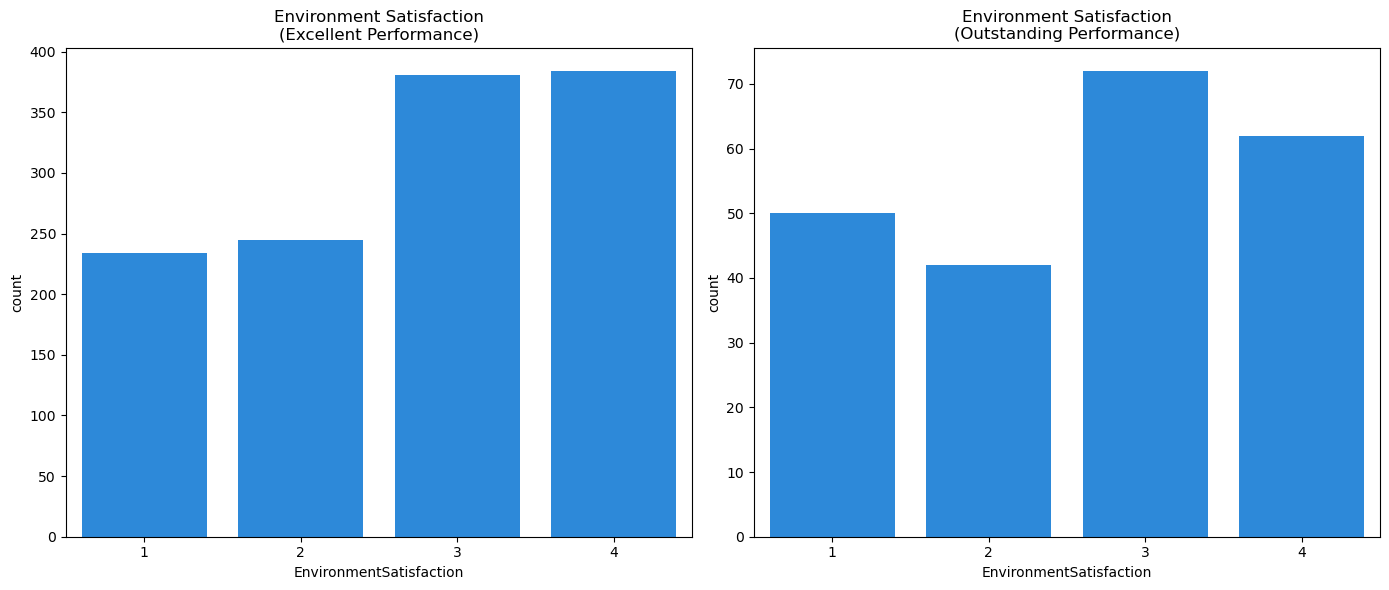

(EnvironmentSatisfaction
 4    0.308682
 3    0.306270
 2    0.196945
 1    0.188103
 Name: proportion, dtype: float64,
 EnvironmentSatisfaction
 3    0.318584
 4    0.274336
 1    0.221239
 2    0.185841
 Name: proportion, dtype: float64)

In [232]:
# 추가 변수 확인
plt.figure(figsize=(14, 6))

# 낮은 성과 그룹
plt.subplot(1, 2, 1)
sns.countplot(x=low_performance['JobInvolvement'], color='#118BF5')
plt.title('Job involvement\n(Excellent Performance)')

# 높은 성과 그룹
plt.subplot(1, 2, 2)
sns.countplot(x=high_performance['JobInvolvement'], color='#118BF5')
plt.title('Job involvement\n(Outstanding Performance)')

plt.tight_layout()
plt.show()

summary_low_sol = low_performance['JobInvolvement'].value_counts(normalize=True)
summary_high_sol = high_performance['JobInvolvement'].value_counts(normalize=True)

summary_low_sol, summary_high_sol

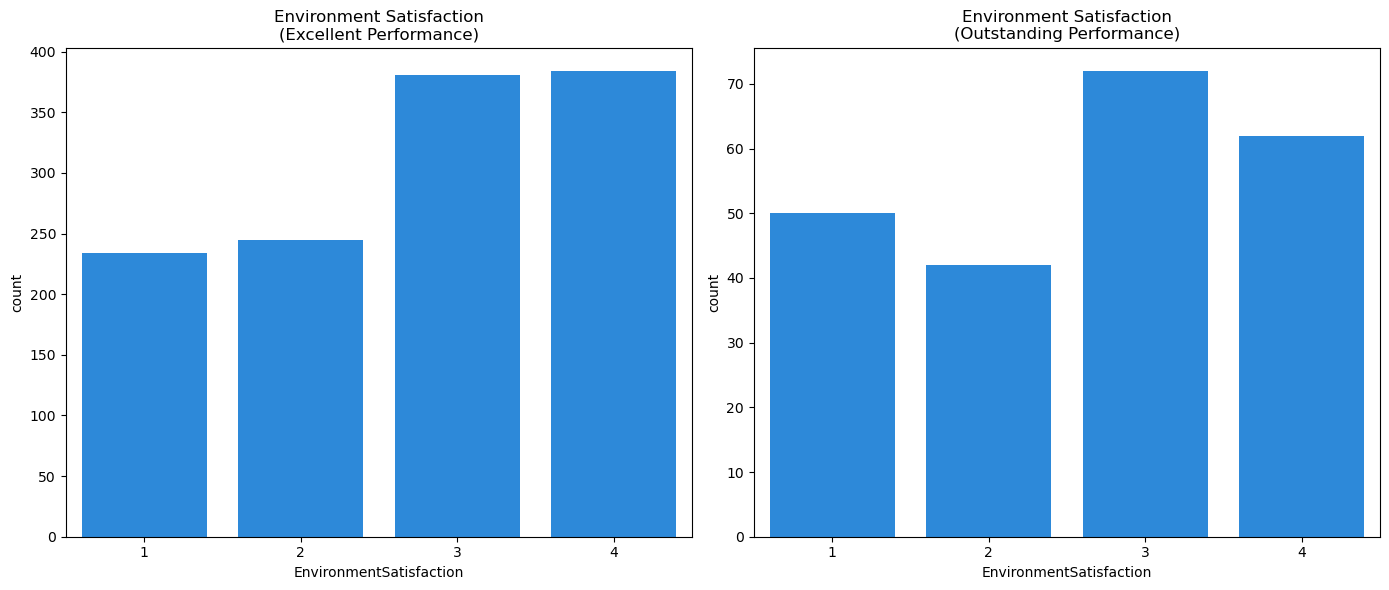

(EnvironmentSatisfaction
 4    0.308682
 3    0.306270
 2    0.196945
 1    0.188103
 Name: proportion, dtype: float64,
 EnvironmentSatisfaction
 3    0.318584
 4    0.274336
 1    0.221239
 2    0.185841
 Name: proportion, dtype: float64)

In [233]:
# 추가 변수 확인
plt.figure(figsize=(14, 6))

# 낮은 성과 그룹
plt.subplot(1, 2, 1)
sns.countplot(x=low_performance['EnvironmentSatisfaction'], color='#118BF5')
plt.title('Environment Satisfaction\n(Excellent Performance)')

# 높은 성과 그룹
plt.subplot(1, 2, 2)
sns.countplot(x=high_performance['EnvironmentSatisfaction'], color='#118BF5')
plt.title('Environment Satisfaction\n(Outstanding Performance)')

plt.tight_layout()
plt.show()

summary_low_sol = low_performance['EnvironmentSatisfaction'].value_counts(normalize=True)
summary_high_sol = high_performance['EnvironmentSatisfaction'].value_counts(normalize=True)

summary_low_sol, summary_high_sol